In [17]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import scipy

In [53]:
train_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_train.csv')
predict_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_test.csv')

train_data=train_data.drop(columns='Client_ID')
predict_data=predict_data.drop(columns='Client_ID')


In [54]:
new_balance_limit_v1=[]
scales=[]
for data in train_data['Balance_Limit_V1']:
    scale=0
    if data[-1]=='K':
        data=str(float(data[:-1]))
        scale=1 #KILO
    elif data[-1]=='M':
        data=str(float(data[:-1]))
        scale=2 #MEGA
    new_balance_limit_v1.append(data)
    scales.append(scale)
train_data['Balance_Limit_V1']=new_balance_limit_v1
train_data['scale_balance_limit_v1']=scales


new_balance_limit_v1=[]
scales=[]
for data in predict_data['Balance_Limit_V1']:
    scale=0
    if data[-1]=='K':
        data=str(float(data[:-1]))
        scale=1 #KILO
    elif data[-1]=='M':
        data=str(float(data[:-1]))
        scale=2 #MEGA
    new_balance_limit_v1.append(data)
    scales.append(scale)
predict_data['Balance_Limit_V1']=new_balance_limit_v1
predict_data['scale_balance_limit_v1']=scales

In [55]:
train_data['DUE_AMT_JULY'].tail()

23995    436470
23996      3888
23997      8235
23998     -3800
23999    110716
Name: DUE_AMT_JULY, dtype: int64

In [22]:
def sigmoid(arr):
    return 1/(1+scipy.special.expit(-arr))

In [23]:
ep=10
gen_1=sigmoid(train_data['DUE_AMT_JULY']/(train_data['PAID_AMT_JULY']+ep))
gen_2=sigmoid(train_data['DUE_AMT_AUG']/(train_data['PAID_AMT_AUG']+ep))
gen_3=sigmoid(train_data['DUE_AMT_SEP']/(train_data['PAID_AMT_SEP']+ep))
gen_4=sigmoid(train_data['DUE_AMT_OCT']/(train_data['PAID_AMT_OCT']+ep))
gen_5=sigmoid(train_data['DUE_AMT_NOV']/(train_data['PAID_AMT_NOV']+ep))
gen_6=sigmoid(train_data['DUE_AMT_DEC']/(train_data['PAID_AMT_DEC']+ep))

gen_7=sigmoid((train_data['DUE_AMT_JULY']+train_data['DUE_AMT_AUG']+train_data['DUE_AMT_SEP']+train_data['DUE_AMT_OCT']+train_data['DUE_AMT_NOV']+train_data['DUE_AMT_DEC'])/(train_data['PAID_AMT_JULY']+train_data['PAID_AMT_AUG']+train_data['PAID_AMT_SEP']+train_data['PAID_AMT_OCT']+train_data['PAID_AMT_NOV']+train_data['PAID_AMT_DEC']+ep))
gen_8=sigmoid(train_data['DUE_AMT_AUG']+train_data['PAID_AMT_AUG'])
gen_9=sigmoid(train_data['DUE_AMT_SEP']+train_data['PAID_AMT_SEP'])
gen_10=sigmoid(train_data['DUE_AMT_OCT']+train_data['PAID_AMT_OCT'])
gen_11=sigmoid(train_data['DUE_AMT_NOV']+train_data['PAID_AMT_NOV'])
gen_12=sigmoid(train_data['DUE_AMT_DEC']+train_data['PAID_AMT_DEC'])
gen_13=train_data['PAY_JULY']+train_data['PAY_AUG']+train_data['PAY_SEP']+train_data['PAY_OCT']+train_data['PAY_NOV']+train_data['PAY_DEC']
train_data['gen1']=gen_1
train_data['gen2']=gen_2
train_data['gen3']=gen_3
train_data['gen4']=gen_4
train_data['gen5']=gen_5
train_data['gen6']=gen_6
train_data['gen7']=gen_7
train_data['gen8']=gen_8
train_data['gen9']=gen_9
train_data['gen10']=gen_10
train_data['gen11']=gen_11
train_data['gen12']=gen_12
train_data['gen13']=gen_13


gen_1=sigmoid(predict_data['DUE_AMT_JULY']/(predict_data['PAID_AMT_JULY']+ep))
gen_2=sigmoid(predict_data['DUE_AMT_AUG']/(predict_data['PAID_AMT_AUG']+ep))
gen_3=sigmoid(predict_data['DUE_AMT_SEP']/(predict_data['PAID_AMT_SEP']+ep))
gen_4=sigmoid(predict_data['DUE_AMT_OCT']/(predict_data['PAID_AMT_OCT']+ep))
gen_5=sigmoid(predict_data['DUE_AMT_NOV']/(predict_data['PAID_AMT_NOV']+ep))
gen_6=sigmoid(predict_data['DUE_AMT_DEC']/(predict_data['PAID_AMT_DEC']+ep))

gen_7=sigmoid((predict_data['DUE_AMT_JULY']+predict_data['DUE_AMT_AUG']+predict_data['DUE_AMT_SEP']+predict_data['DUE_AMT_OCT']+predict_data['DUE_AMT_NOV']+predict_data['DUE_AMT_DEC'])/(predict_data['PAID_AMT_JULY']+predict_data['PAID_AMT_AUG']+predict_data['PAID_AMT_SEP']+predict_data['PAID_AMT_OCT']+predict_data['PAID_AMT_NOV']+predict_data['PAID_AMT_DEC']+ep))
gen_8=sigmoid(predict_data['DUE_AMT_AUG']+predict_data['PAID_AMT_AUG'])
gen_9=sigmoid(predict_data['DUE_AMT_SEP']+predict_data['PAID_AMT_SEP'])
gen_10=sigmoid(predict_data['DUE_AMT_OCT']+predict_data['PAID_AMT_OCT'])
gen_11=sigmoid(predict_data['DUE_AMT_NOV']+predict_data['PAID_AMT_NOV'])
gen_12=sigmoid(predict_data['DUE_AMT_DEC']+predict_data['PAID_AMT_DEC'])
gen_13=predict_data['PAY_JULY']+predict_data['PAY_AUG']+predict_data['PAY_SEP']+predict_data['PAY_OCT']+predict_data['PAY_NOV']+predict_data['PAY_DEC']


predict_data['gen1']=gen_1
predict_data['gen2']=gen_2
predict_data['gen3']=gen_3
predict_data['gen4']=gen_4
predict_data['gen5']=gen_5
predict_data['gen6']=gen_6
predict_data['gen7']=gen_7
predict_data['gen8']=gen_8
predict_data['gen9']=gen_9
predict_data['gen10']=gen_10
predict_data['gen11']=gen_11
predict_data['gen12']=gen_12
predict_data['gen13']=gen_13

In [56]:
cat_cols=['Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'AGE']

In [57]:
train_data = pd.get_dummies( train_data,columns = cat_cols )
predict_data=pd.get_dummies( predict_data,columns = cat_cols )

In [58]:
train_data.shape

(24000, 32)

In [59]:
#print(train_data.isnull().sum().sum(),predict_data.isnull().sum().sum())

In [60]:
only_in_train=[x for x in train_data if x not in predict_data]
only_in_predict=[x for x in predict_data if x not in train_data] #this  should be []
print(only_in_train,only_in_predict)

['NEXT_MONTH_DEFAULT'] []


In [61]:
#make the no of predict_data columns same as the train_data
for col in only_in_train:
    if col=='NEXT_MONTH_DEFAULT':
        pass
    else:
        predict_data[col]=np.zeros((len(predict_data[predict_data.keys()[0]]),1))
        

Random over-sampling:
1    18670
0    18670
Name: NEXT_MONTH_DEFAULT, dtype: int64


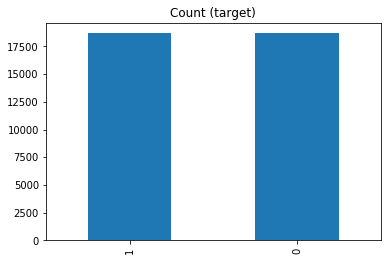

In [18]:
# Over sampling
count_class_0, count_class_1 = train_data['NEXT_MONTH_DEFAULT'].value_counts()
df_class_0 = train_data[train_data['NEXT_MONTH_DEFAULT'] == 0]
df_class_1 = train_data[train_data['NEXT_MONTH_DEFAULT'] == 1]
# over sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over['NEXT_MONTH_DEFAULT'].value_counts())

df_over['NEXT_MONTH_DEFAULT'].value_counts().plot(kind='bar', title='Count (target)');

# under sampling
'''
df_class_0_under = df_class_0.sample(count_class_1, replace=True)
df_under = pd.concat([df_class_1, df_class_0_under], axis=0)

print('Random under-sampling:')
print(df_under['NEXT_MONTH_DEFAULT'].value_counts())

df_under['NEXT_MONTH_DEFAULT'].value_counts().plot(kind='bar', title='Count (target)');

'''
# train_data= df_test_under / df_test_over
train_data=df_over

In [62]:
train_data.drop('NEXT_MONTH_DEFAULT',axis=1).keys(),predict_data.keys()

(Index(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
        'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
        'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
        'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
        'PAID_AMT_DEC', 'scale_balance_limit_v1', 'Gender_F', 'Gender_M',
        'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
        'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
        'MARITAL_STATUS_Single', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
        'AGE_More than 65'],
       dtype='object'),
 Index(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
        'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
        'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
        'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
        'PAID_AMT_DEC', 'scale_balance_limit_v1', 'Gender_F', 'Gender_M',
        'ED

In [63]:
X_train, X, y_train, y = train_test_split(train_data.drop('NEXT_MONTH_DEFAULT',axis=1),train_data['NEXT_MONTH_DEFAULT'],test_size = 0.3,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X,y,test_size = 0.5,shuffle=False) 

In [64]:
x_udith=X_train
y_udith=y_train

%store x_udith
%store y_udith

Stored 'x_udith' (DataFrame)
Stored 'y_udith' (Series)


In [65]:
scaler = MinMaxScaler()
scaler=scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))
X_val=pd.DataFrame(scaler.transform(X_val))
X_predict=pd.DataFrame(scaler.transform(predict_data))
'''

std_scale = StandardScaler().fit(X_train)
X_train = pd.DataFrame(std_scale.transform(X_train))
X_val=pd.DataFrame(std_scale.transform(X_val))
X_test  = pd.DataFrame(std_scale.transform(X_test))
X_predict  = pd.DataFrame(std_scale.transform(predict_data))'''

'\n\nstd_scale = StandardScaler().fit(X_train)\nX_train = pd.DataFrame(std_scale.transform(X_train))\nX_val=pd.DataFrame(std_scale.transform(X_val))\nX_test  = pd.DataFrame(std_scale.transform(X_test))\nX_predict  = pd.DataFrame(std_scale.transform(predict_data))'

In [67]:
train_data.shape

(24000, 32)

In [68]:
type(X_train)

pandas.core.frame.DataFrame

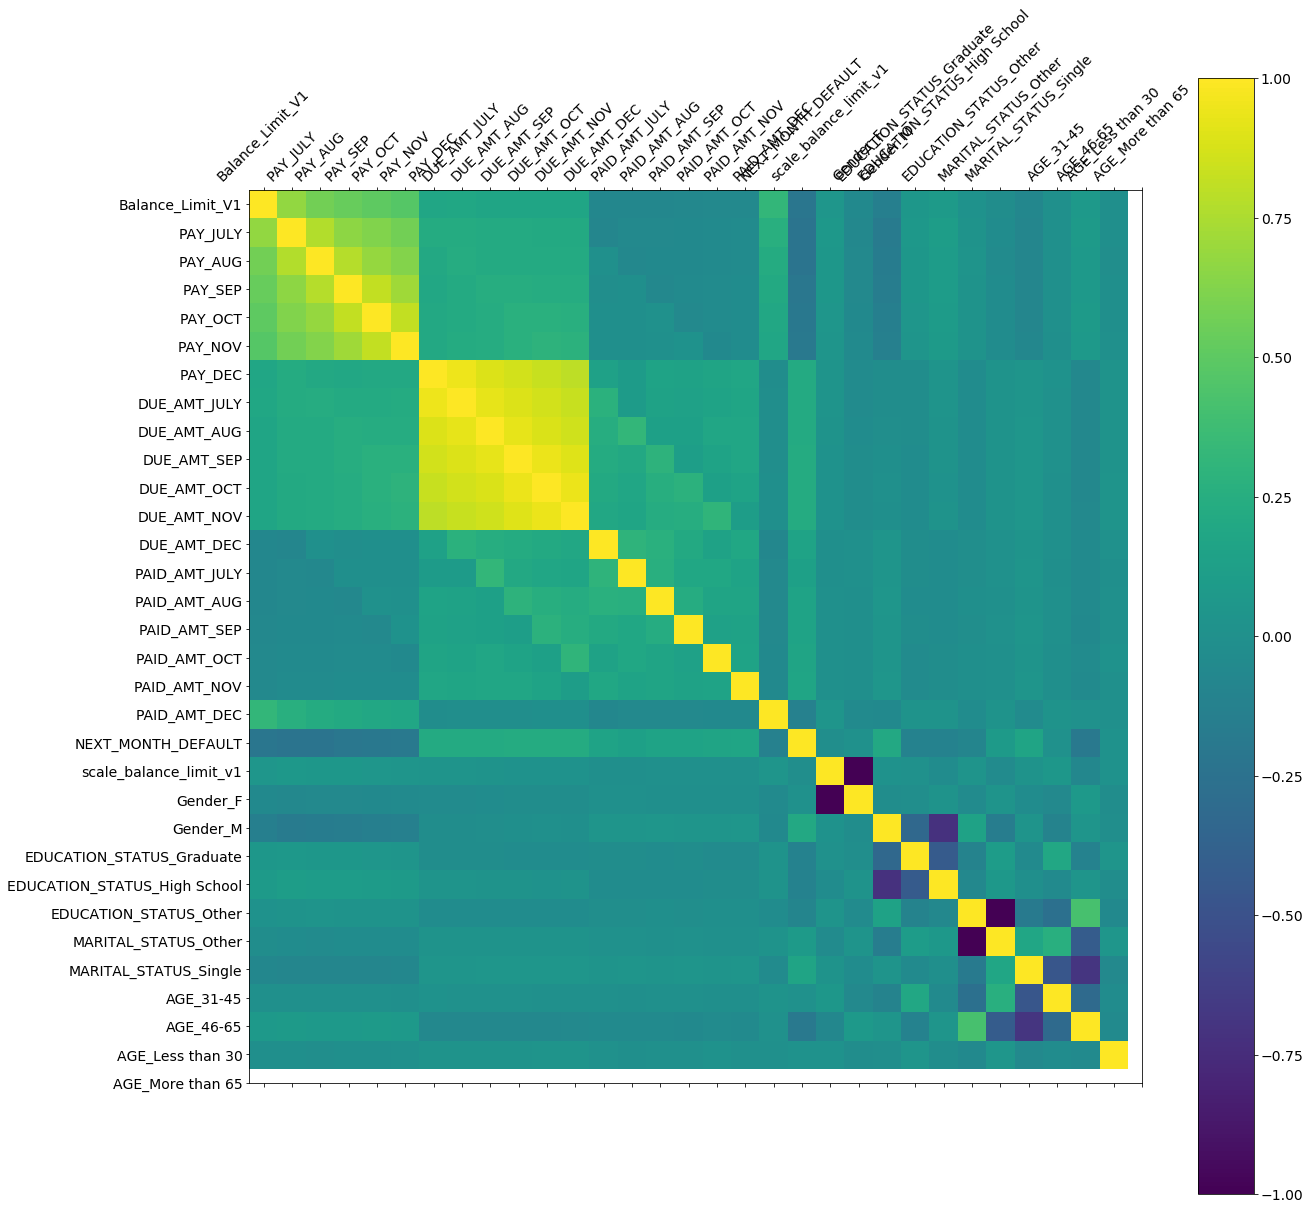

In [69]:
#pd.plotting.scatter_matrix(X_train,figsize=(30,30))
df=train_data
f = plt.figure(figsize=(20,20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);
plt.savefig('E:/ML_IP/ML_projects/datastorm/corr.png')

In [70]:
X_train=np.array(X_train)[:,:-1]

In [39]:
predict_data.keys()[7:13]

Index(['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC'],
      dtype='object')

In [40]:
predict_data.keys()[19:31]

Index(['scale_balance_limit_v1', 'Gender_F', 'Gender_M',
       'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
       'AGE_More than 65'],
      dtype='object')

In [41]:
X_val.shape

(3600, 31)

In [42]:
X_train=np.array(X_train) #(16800, 90) 
X_test=np.array(X_test) #(3600, 90) 
X_val=np.array(X_val) #(3600, 90) 
y_train=np.array(y_train) #(16800,)
y_test=np.array(y_test) #(3600,)
y_val=np.array(y_val) #(3600,)
X_predict=np.array(X_predict) #(6000,90)
print('\nSHAPES\n',X_train.shape,'\n',X_test.shape,'\n',X_val.shape,'\n',y_train.shape,'\n',y_test.shape,'\n',y_val.shape,'\n',X_predict.shape)

n_features=X_train.shape[1]
print('no of features :',n_features)


pd.DataFrame(X_train).to_csv("data/X_train.csv")
pd.DataFrame(X_test).to_csv("data/X_test.csv")
pd.DataFrame(X_val).to_csv("data/X_val.csv")
pd.DataFrame(y_train).to_csv("data/y_train.csv")
pd.DataFrame(y_test).to_csv("data/y_test.csv")
pd.DataFrame(y_val).to_csv("data/y_val.csv")
pd.DataFrame(X_predict).to_csv("data/X_predict.csv")

%store X_train
%store X_test
%store X_val
%store y_train
%store y_test
%store y_val
%store X_predict




SHAPES
 (16800, 31) 
 (3600, 31) 
 (3600, 31) 
 (16800,) 
 (3600,) 
 (3600,) 
 (6000, 31)
no of features : 31
Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'X_val' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'y_val' (ndarray)
Stored 'X_predict' (ndarray)


Stored 'X_train' (DataFrame)
Stored 'y_train' (Series)
Stored 'X_test' (DataFrame)
Stored 'y_test' (Series)


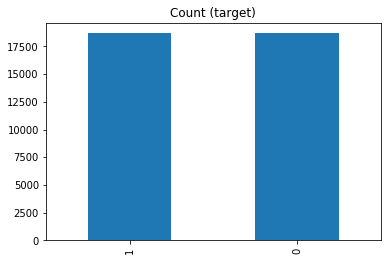

In [43]:
### afham
%store -r train_data
tot=train_data
# Over sampling
count_class_0, count_class_1 = tot['NEXT_MONTH_DEFAULT'].value_counts()
df_class_0 = train_data[tot['NEXT_MONTH_DEFAULT'] == 0]
df_class_1 = train_data[tot['NEXT_MONTH_DEFAULT'] == 1]
# over sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

df_over['NEXT_MONTH_DEFAULT'].value_counts().plot(kind='bar', title='Count (target)');

# train_data= df_test_under / df_test_over
tot=df_over

tot['NEXT_MONTH_DEFAULT'].value_counts().plot(kind='bar', title='Count (target)');

target = 'NEXT_MONTH_DEFAULT'
ID = 'Client_ID'

X_train, X_test, y_train, y_test = train_test_split(tot.drop([target,ID,'Balance_Limit_V1','Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'],axis=1), 
                                                    tot[target], test_size=0.30)
# check the type
%store X_train
%store y_train
%store X_test
%store y_test



X_train=np.array(X_train) #(16800, 90) 
X_test=np.array(X_test) #(3600, 90) 
y_train=np.array(y_train) #(16800,)
y_test=np.array(y_test) #(3600,)


In [44]:
n_features=X_train.shape[1]

In [52]:
X_train.shape

(26138, 50)

In [ ]:
%matplotlib inline
df=pd.DataFrame()
df['op']=y_train
for i in range(27):
    df['ip']=X_train[:,i]
    pd.plotting.scatter_matrix(df,figsize=(5,5))
    plt.suptitle(predict_data.keys()[i])

no of features : 50


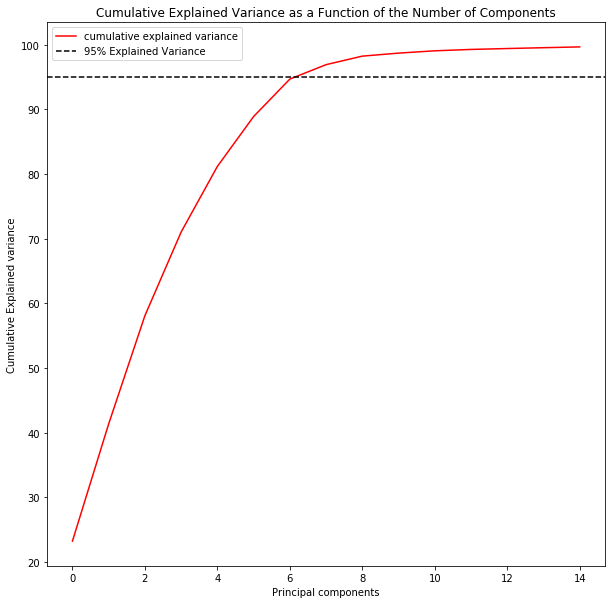

In [73]:
#analyse variance by PCA curve


pca_dims=15   ###### number of wanted PCA dims

print('no of features :',n_features)

pca = PCA(n_components=pca_dims)
X_train_pca=pca.fit_transform(X_train)  
X_test_pca=pca.fit_transform(X_test)  
#X_val_pca=pca.fit_transform(X_val)  

################################### plot PCA- CURVE ##########################################################################

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')
plt.savefig('E:/ML_IP/ML_projects/datastorm/pca_cumulative.png')

In [25]:
pca_reduced=pd.DataFrame(X_train_pca)
y=pd.DataFrame()
y['target']=y_train
n=0
m=1
o=2

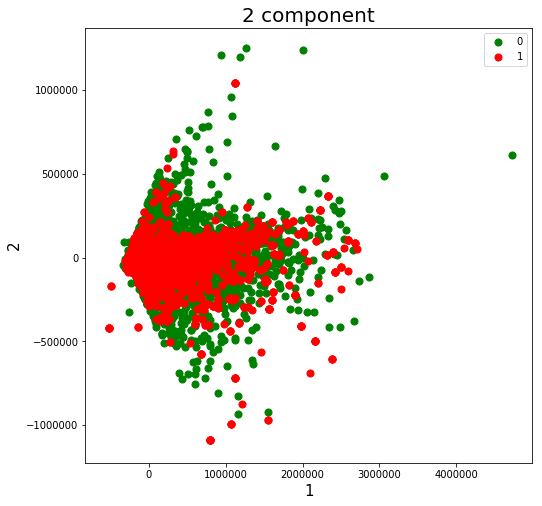

In [26]:
principalDf = pd.DataFrame(data = pca_reduced , columns = [n, m])#,'PC3'])
y_train_df = pd.DataFrame(data = y , columns = ['target'])


finalDf = pd.concat([principalDf, y_train_df[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)#, projection='3d')
ax.set_xlabel('1', fontsize = 15)
ax.set_ylabel('2', fontsize = 15)
#ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('2 component', fontsize = 20)
targets = [0,1]
colors = ['g','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, n]
               , finalDf.loc[indicesToKeep, m]#,finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
    
    
ax.legend(targets)

In [1]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,LeakyReLU,InputLayer,Input
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.regularizers import l2,l1

#n_features=20 #if pca used
n_features=X_train.shape[1]

model1=Sequential([
                  Dense(128,activation='relu',input_shape=(n_features,)),
                  Dense(256,activation='relu',kernel_regularizer=l2(0.2)),
                  Dense(1,activation='sigmoid')

])

model2=Sequential([
                  Dense(256,activation='relu',input_shape=(n_features,)),
                  Dense(1024,activation='relu'),
                  Dense(512,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(512,activation='relu'),
                  Dense(1024,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(10,activation='relu'),

                  Dense(1,activation='sigmoid')

])


model1.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics = ['acc'])
model2.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics = ['acc'])

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [4]:
history = model1.fit(X_train,y_train, epochs=20,verbose=2,validation_data=(X_test,y_test),batch_size=30,shuffle=True)

Train on 16800 samples, validate on 7200 samples
Epoch 1/20
 - 1s - loss: 7.5557 - acc: 0.6468 - val_loss: 3.8873 - val_acc: 0.7776
Epoch 2/20
 - 1s - loss: 3.6238 - acc: 0.7773 - val_loss: 3.4424 - val_acc: 0.7776
Epoch 3/20
 - 1s - loss: 9.2561 - acc: 0.4913 - val_loss: 4.1379 - val_acc: 0.7776
Epoch 4/20
 - 1s - loss: 7.4619 - acc: 0.7779 - val_loss: 4.7635 - val_acc: 0.7776
Epoch 5/20
 - 1s - loss: 4.0851 - acc: 0.7780 - val_loss: 3.6964 - val_acc: 0.7776
Epoch 6/20
 - 1s - loss: 4.4246 - acc: 0.7368 - val_loss: 6.6137 - val_acc: 0.7776
Epoch 7/20
 - 1s - loss: 4.0331 - acc: 0.7780 - val_loss: 3.5333 - val_acc: 0.7776
Epoch 8/20
 - 1s - loss: 3.4788 - acc: 0.7780 - val_loss: 3.4480 - val_acc: 0.7776
Epoch 9/20
 - 1s - loss: 5.0851 - acc: 0.7777 - val_loss: 3.6794 - val_acc: 0.7776
Epoch 10/20
 - 1s - loss: 3.5126 - acc: 0.7780 - val_loss: 3.4449 - val_acc: 0.7776
Epoch 11/20
 - 1s - loss: 7.8262 - acc: 0.7775 - val_loss: 8.2683 - val_acc: 0.7776
Epoch 12/20
 - 1s - loss: 5.1095 - a

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()